In [96]:
import pandas as pd

data = pd.read_csv('data/ab_data_tourist.zip')

data.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   294478 non-null  int64 
 1   date      294478 non-null  object
 2   group     294478 non-null  object
 3   purchase  294478 non-null  int64 
 4   price     294478 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.2+ MB


In [98]:
# Task 7.2
data['date'] = pd.to_datetime(data['date'])
data_date = data.groupby('group')['date'].agg(['min', 'max'])
display(data_date)

,min,max
group,,
A,2021-01-02,2021-01-24
B,2021-01-02,2021-01-24


In [99]:
# Task 7.3
group_cols = {'user_id': 'count', 'purchase':'sum', 'price': 'sum'}
data_conv = data.groupby('group', as_index=False).agg(group_cols)
display(data_conv)

,group,user_id,purchase,price
0,A,147202,17723,1436260000
1,B,147276,17514,1554100000


In [100]:
# Task 7.4
users_a = set(data['user_id'][data['group'] == 'A'])
users_b = set(data['user_id'][data['group'] == 'B'])
users_intersection = users_a.intersection(users_b)

print('Количество пользователей, которые есть в каждой группе: {}'.format(len(users_intersection)))
# Исключение пользователей, которые есть в каждой группе
updated_data = data[data['user_id'].apply(lambda x : x not in users_intersection)]
# Проверка правильности
print(updated_data.shape, updated_data['user_id'].nunique() == (len(users_a) + len(users_b) - 2 * len(users_intersection)))

Количество пользователей, которые есть в каждой группе: 1895
(290688, 5) True


In [101]:
# Task 7.5
data_1 = updated_data.groupby('group', as_index=False).agg(group_cols)
data_1.rename(columns={'user_id': 'count_visits', 'purchase': 'count_purchases', 'price': 'sum_price'}, inplace=True)
display(data_1)

,group,count_visits,count_purchases,sum_price
0,A,145307,17487,1417780000
1,B,145381,17290,1533010000


In [102]:
# Task 7.6
data_1['conversion'] = data_1['count_purchases'] / data_1['count_visits']
data_1['mean_check'] = data_1['sum_price'] / data_1['count_purchases']

print('Конверсия группы A: {}'.format(round(data_1[data_1['group'] == 'A']['conversion'].iloc[0] * 100, 2)))
print('Конверсия группы B: {}'.format(round(data_1[data_1['group'] == 'B']['conversion'].iloc[0] * 100, 2)))
print('Средний чек группы A: {}'.format(round(data_1[data_1['group'] == 'A']['mean_check'].iloc[0])))
print('Средний чек группы B: {}'.format(round(data_1[data_1['group'] == 'B']['mean_check'].iloc[0])))

Конверсия группы A: 12.03
Конверсия группы B: 11.89
Средний чек группы A: 81076
Средний чек группы B: 88665


<AxesSubplot: xlabel='price', ylabel='group'>

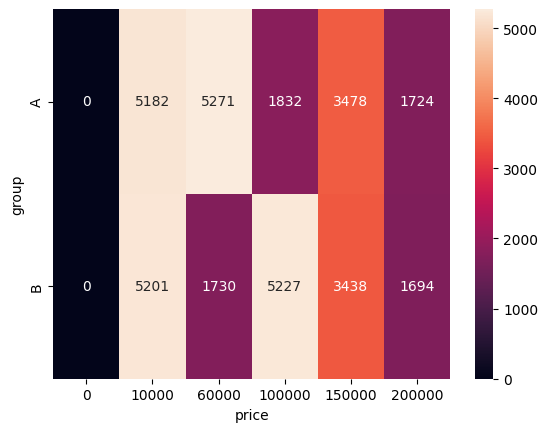

In [103]:
# Task 7.7
import seaborn as sns

sns.heatmap(updated_data.groupby(['group', 'price'],
                                 as_index=False)['purchase'].sum().pivot_table(index='group',
                                                                                columns='price', values='purchase'), annot=True, fmt='d')

In [104]:
import warnings
warnings.filterwarnings('ignore')

data_2 = updated_data.groupby(by=['group', 'date'], as_index=False).agg(group_cols).sort_values('date', ascending=True)

data_2.rename(columns={'user_id': 'count_visits', 'purchase': 'count_purchases', 'price': 'sum_price'}, inplace=True)

daily_data_a = data_2[data_2['group'] == 'A']
daily_data_b = data_2[data_2['group'] == 'B']

# daily_data_a.loc[:, 'cum_conv'] = daily_data_a['count_purchases'].cumsum() / daily_data_a['count_visits'].cumsum()
# daily_data_a.loc[:, 'cum_check'] = daily_data_a['sum_price'].cumsum() / daily_data_a['count_purchases'].cumsum()
# daily_data_b.loc[:, 'cum_conv'] = daily_data_b['count_purchases'].cumsum() / daily_data_b['count_visits'].cumsum()
# daily_data_b.loc[:, 'cum_check'] = daily_data_b['sum_price'].cumsum() / daily_data_b['count_purchases'].cumsum()

daily_data_a.loc[:, 'cum_conv'] = round(daily_data_a['count_purchases'].cumsum() / daily_data_a['count_visits'] * 100, 2)
daily_data_a.loc[:, 'cum_check'] = round(daily_data_a['sum_price'].cumsum() / daily_data_a['count_purchases'].cumsum())
daily_data_b.loc[:, 'cum_conv'] = round(daily_data_b['count_purchases'].cumsum() / daily_data_b['count_visits'].cumsum() * 100, 2)
daily_data_b.loc[:, 'cum_check'] = round(daily_data_b['sum_price'].cumsum() / daily_data_b['count_purchases'].cumsum())

# daily_data_a.loc[:, 'cum_conv'] = (daily_data_a['count_purchases'] / daily_data_a['count_visits']).cumsum()
# daily_data_a.loc[:, 'cum_check'] = (daily_data_a['sum_price'] / daily_data_a['count_purchases']).cumsum()
# daily_data_b.loc[:, 'cum_conv'] = (daily_data_b['count_purchases'] / daily_data_b['count_visits']).cumsum()
# daily_data_b.loc[:, 'cum_check'] = (daily_data_b['sum_price'] / daily_data_b['count_purchases']).cumsum()


display(daily_data_a[daily_data_a['date'] == '2021-01-03'].head())
display(daily_data_b[daily_data_b['date'] == '2021-01-03'].head())

,group,date,count_visits,count_purchases,sum_price,cum_conv,cum_check
1,A,2021-01-03,6596,748,62000000,16.78,82575.0


,group,date,count_visits,count_purchases,sum_price,cum_conv,cum_check
24,B,2021-01-03,6619,754,65960000,11.59,87006.0


In [105]:
# Task 7.8
data_tmp = updated_data.groupby(by=['group', 'date'], as_index=False).agg(group_cols)
data_tmp.rename(columns={'user_id': 'count_visits', 'purchase': 'count_purchases', 'price': 'sum_price'}, inplace=True)


def add_conv_and_mean_check(origin_data, group_symbol):
    result = origin_data[origin_data['group'] == group_symbol].sort_values(by='date', ascending=True)
    result['conversion'] = result['count_purchases'] / result['count_visits']
    result['mean_check'] = result['sum_price'] / result['count_purchases']
    return result

data_tmp_a = add_conv_and_mean_check(data_tmp, 'A')
data_tmp_b = add_conv_and_mean_check(data_tmp, 'B')

display(data_tmp_a[data_tmp_a['date'] == '2021-01-03'].head())
display(data_tmp_b[data_tmp_b['date'] == '2021-01-03'].head())

,group,date,count_visits,count_purchases,sum_price,conversion,mean_check
1,A,2021-01-03,6596,748,62000000,0.113402,82887.700535


,group,date,count_visits,count_purchases,sum_price,conversion,mean_check
24,B,2021-01-03,6619,754,65960000,0.113914,87480.106101


In [125]:
# Task 7.9
def add_cums(origin_data, group_symbol):
    result = origin_data[origin_data['group'] == group_symbol].sort_values(by='date', ascending=True)
    result['cum_count_visits'] = result['count_visits'].cumsum()
    result['cum_count_purchases'] = result['count_purchases'].cumsum()
    result['cum_sum_price'] = result['sum_price'].cumsum()

    result['cum_conversion'] = result['cum_count_purchases'] / result['cum_count_visits']
    result['cum_mean_check'] = result['cum_sum_price'] / result['cum_count_purchases']
    return result


data_tmp_a = add_cums(data_tmp, 'A')
data_tmp_b = add_cums(data_tmp, 'B')

print('Кумулятивная конверсия в группе B на 20 января 2021 года: {}'.format(round(data_tmp_b[data_tmp_b['date'] == '2021-01-20']['cum_conversion'].iloc[0] * 100, 2)))
print('Кумулятивный средний чек в группе А на 12 января 2021 года: {}'.format(round(data_tmp_a[data_tmp_a['date'] == '2021-01-12']['cum_mean_check'].iloc[0])))

Кумулятивная конверсия была в группе B на 20 января 2021 года: 11.9
Кумулятивный средний чек был в группе А на 12 января 2021 года: 81492
